<a href="https://colab.research.google.com/github/gtoubian/cce/blob/main/1_7_SQL_Part_2_Lecture.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

As you have seen during last lecture, SQL is a language that deals with creating and modifying databases. Today we will dive into the Syntax of SQL.

#Creating Databases

We first need to import the sqlite package and create an empty database.

In [1]:
import sqlite3 as sql
conn = sql.connect('example.db')

In [2]:
import pandas as pd

You'll see in the files tab that you now have 'example.db' listed. Now let's try filling it with values.

In [ ]:
c=conn.cursor()

#Create Table
c.execute('''CREATE TABLE me (Username, Year, TIme, City)''')

#Insert a row of data

c.execute("INSERT INTO me VALUES ('Usama', '2021', '10:30:00', 'Toronto')")

#Save (commit) the changes
conn.commit()




In [7]:
url = 'https://ckan0.cf.opendata.inter.prod-toronto.ca/download_resource/e5bf35bc-e681-43da-b2ce-0242d00922ad?format=csv'

df = pd.read_csv(url)
df.to_sql('users', con=conn)
df.head()

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:2615: UserWarning: The spaces in these column names will not be changed. In pandas versions < 0.14, spaces were converted to underscores.
  method=method,


,_id,Assigned_ID,Outbreak Associated,Age Group,Neighbourhood Name,FSA,Source of Infection,Classification,Episode Date,Reported Date,Client Gender,Outcome,Currently Hospitalized,Currently in ICU,Currently Intubated,Ever Hospitalized,Ever in ICU,Ever Intubated
0,174440,1,Sporadic,50 to 59 Years,Willowdale East,M2N,Travel,CONFIRMED,2020-01-22,2020-01-23,FEMALE,RESOLVED,No,No,No,No,No,No
1,174441,2,Sporadic,50 to 59 Years,Willowdale East,M2N,Travel,CONFIRMED,2020-01-21,2020-01-23,MALE,RESOLVED,No,No,No,Yes,No,No
2,174442,3,Sporadic,20 to 29 Years,Parkwoods-Donalda,M3A,Travel,CONFIRMED,2020-02-05,2020-02-21,FEMALE,RESOLVED,No,No,No,No,No,No
3,174443,4,Sporadic,60 to 69 Years,Church-Yonge Corridor,M4W,Travel,CONFIRMED,2020-02-16,2020-02-25,FEMALE,RESOLVED,No,No,No,No,No,No
4,174444,5,Sporadic,60 to 69 Years,Church-Yonge Corridor,M4W,Travel,CONFIRMED,2020-02-20,2020-02-26,MALE,RESOLVED,No,No,No,No,No,No


##LIMIT OFFSET

We use LIMIT OFFSET clauses to constrain the number of rows returned

Running Queries on SQL uses the following format: SELECT (Column Name) from (Table name)....This is usually followed by other conditionals that we will see.

In [8]:
pd.read_sql("SELECT * From users LIMIT 5", con=conn)

,index,_id,Assigned_ID,Outbreak Associated,Age Group,Neighbourhood Name,FSA,Source of Infection,Classification,Episode Date,Reported Date,Client Gender,Outcome,Currently Hospitalized,Currently in ICU,Currently Intubated,Ever Hospitalized,Ever in ICU,Ever Intubated
0,0,174440,1,Sporadic,50 to 59 Years,Willowdale East,M2N,Travel,CONFIRMED,2020-01-22,2020-01-23,FEMALE,RESOLVED,No,No,No,No,No,No
1,1,174441,2,Sporadic,50 to 59 Years,Willowdale East,M2N,Travel,CONFIRMED,2020-01-21,2020-01-23,MALE,RESOLVED,No,No,No,Yes,No,No
2,2,174442,3,Sporadic,20 to 29 Years,Parkwoods-Donalda,M3A,Travel,CONFIRMED,2020-02-05,2020-02-21,FEMALE,RESOLVED,No,No,No,No,No,No
3,3,174443,4,Sporadic,60 to 69 Years,Church-Yonge Corridor,M4W,Travel,CONFIRMED,2020-02-16,2020-02-25,FEMALE,RESOLVED,No,No,No,No,No,No
4,4,174444,5,Sporadic,60 to 69 Years,Church-Yonge Corridor,M4W,Travel,CONFIRMED,2020-02-20,2020-02-26,MALE,RESOLVED,No,No,No,No,No,No


##WHERE

The WHERE clause is used to filter rows in our database based on a Boolean Conditional we set.


Use LIMIT OFFSET clauses to constrain the number of rows returned
Use INNER JOIN or LEFT JOIN to query data from multiple tables using join.
Use GROUP BY to get the group rows into groups and apply aggregate function for each group.
Use HAVING clause to filter groups

In [9]:
pd.read_sql("SELECT * from users WHERE `Client Gender` = 'MALE' LIMIT 3", con = conn)

,index,_id,Assigned_ID,Outbreak Associated,Age Group,Neighbourhood Name,FSA,Source of Infection,Classification,Episode Date,Reported Date,Client Gender,Outcome,Currently Hospitalized,Currently in ICU,Currently Intubated,Ever Hospitalized,Ever in ICU,Ever Intubated
0,1,174441,2,Sporadic,50 to 59 Years,Willowdale East,M2N,Travel,CONFIRMED,2020-01-21,2020-01-23,MALE,RESOLVED,No,No,No,Yes,No,No
1,4,174444,5,Sporadic,60 to 69 Years,Church-Yonge Corridor,M4W,Travel,CONFIRMED,2020-02-20,2020-02-26,MALE,RESOLVED,No,No,No,No,No,No
2,5,174445,6,Sporadic,50 to 59 Years,Newtonbrook West,M2R,Travel,CONFIRMED,2020-02-24,2020-02-27,MALE,RESOLVED,No,No,No,No,No,No


##ORDER BY
The ORDER BY clause is used to sort the result set. Results are defaulted to returning Ascending results (Low to High) and if in case we want to have our results in descending order (High to Low) we simply add 'DESC' at the end of the order by query.

In [13]:
pd.read_sql("SELECT * from users where `Client Gender` = 'MALE' ORDER BY `Episode Date` DESC LIMIT 10", con = conn)

,index,_id,Assigned_ID,Outbreak Associated,Age Group,Neighbourhood Name,FSA,Source of Infection,Classification,Episode Date,Reported Date,Client Gender,Outcome,Currently Hospitalized,Currently in ICU,Currently Intubated,Ever Hospitalized,Ever in ICU,Ever Intubated
0,93177,267617,95946,Sporadic,19 and younger,Maple Leaf,M6L,Pending,PROBABLE,2021-02-15,2021-02-15,MALE,ACTIVE,No,No,No,No,No,No
1,93179,267619,95948,Sporadic,19 and younger,Maple Leaf,M6L,Pending,PROBABLE,2021-02-15,2021-02-15,MALE,ACTIVE,No,No,No,No,No,No
2,92692,267132,95461,Sporadic,50 to 59 Years,Thorncliffe Park,M4H,Pending,CONFIRMED,2021-02-14,2021-02-14,MALE,ACTIVE,No,No,No,No,No,No
3,92830,267270,95599,Sporadic,70 to 79 Years,Mount Olive-Silverstone-Jamestown,M9V,Community,PROBABLE,2021-02-14,2021-02-14,MALE,ACTIVE,No,No,No,No,No,No
4,92850,267290,95619,Sporadic,20 to 29 Years,West Hill,M1E,Pending,PROBABLE,2021-02-14,2021-02-14,MALE,ACTIVE,No,No,No,No,No,No
5,92863,267303,95632,Sporadic,19 and younger,Clairlea-Birchmount,M1L,Household Contact,PROBABLE,2021-02-14,2021-02-14,MALE,ACTIVE,No,No,No,No,No,No
6,92902,267342,95671,Outbreak Associated,None,None,None,Pending,PROBABLE,2021-02-14,2021-02-14,MALE,ACTIVE,No,No,No,No,No,No
7,92903,267343,95672,Sporadic,19 and younger,Clairlea-Birchmount,M1L,Pending,PROBABLE,2021-02-14,2021-02-14,MALE,ACTIVE,No,No,No,No,No,No
8,92911,267351,95680,Sporadic,30 to 39 Years,None,None,Pending,PROBABLE,2021-02-14,2021-02-14,MALE,ACTIVE,No,No,No,No,No,No
9,92917,267357,95686,Sporadic,90 and older,Forest Hill South,M5P,Pending,PROBABLE,2021-02-14,2021-02-14,MALE,ACTIVE,No,No,No,No,No,No


#Distinct

In the case where we have multiple rows in a column sharing a common value, we use the DISTINCT clause to query unique rows in a table.

In [18]:
pd.read_sql("SELECT DISTINCT(`Source of Infection`) from users Where `Client Gender` = 'MALE' ORDER BY `Episode Date` LIMIT 10", con = conn)

,Source of Infection
0,Travel
1,No Information
2,Community
3,Close Contact
4,Household Contact
5,"Outbreaks, Healthcare Institutions"
6,"Outbreaks, Other Settings"
7,Pending
8,"Outbreaks, Congregate Settings"


##Groupby and Having

Much like you saw with Pandas, we can group rows in a table based off common entries in a specific column. If we want to further query for specific conditions within those columns we use a HAVING clause with a Boolean Conditional. The HAVING and WHERE clauses are alike with the main difference being that we using HAVING on Groupby Tables.

In [19]:
pd.read_sql("SELECT * from users group by `Client Gender`", con = conn)

,index,_id,Assigned_ID,Outbreak Associated,Age Group,Neighbourhood Name,FSA,Source of Infection,Classification,Episode Date,Reported Date,Client Gender,Outcome,Currently Hospitalized,Currently in ICU,Currently Intubated,Ever Hospitalized,Ever in ICU,Ever Intubated
0,93184,267624,95953,Outbreak Associated,40 to 49 Years,Dovercourt-Wallace Emerson-Junction,M6H,Pending,CONFIRMED,2021-02-15,2021-02-15,FEMALE,ACTIVE,No,No,No,No,No,No
1,93183,267623,95952,Sporadic,50 to 59 Years,Thistletown-Beaumond Heights,M9V,Pending,CONFIRMED,2021-02-13,2021-02-15,MALE,ACTIVE,No,No,No,No,No,No
2,89595,264035,92329,Sporadic,20 to 29 Years,Dufferin Grove,M6H,Community,CONFIRMED,2021-01-27,2021-02-02,NON-BINARY,RESOLVED,No,No,No,No,No,No
3,82170,256610,84606,Sporadic,30 to 39 Years,Westminster-Branson,M2R,Community,CONFIRMED,2021-01-18,2021-01-23,OTHER,RESOLVED,No,No,No,No,No,No
4,68019,242459,70161,Sporadic,40 to 49 Years,Roncesvalles,M6R,Close Contact,CONFIRMED,2021-01-01,2021-01-03,TRANSGENDER,RESOLVED,No,No,No,No,No,No
5,93180,267620,95949,Sporadic,60 to 69 Years,Rouge,M1B,Pending,CONFIRMED,2021-02-12,2021-02-14,UNKNOWN,ACTIVE,No,No,No,No,No,No


In [21]:
pd.read_sql("SELECT * from users group by `Client Gender` having Outcome = 'ACTIVE'", con=conn)

,index,_id,Assigned_ID,Outbreak Associated,Age Group,Neighbourhood Name,FSA,Source of Infection,Classification,Episode Date,Reported Date,Client Gender,Outcome,Currently Hospitalized,Currently in ICU,Currently Intubated,Ever Hospitalized,Ever in ICU,Ever Intubated
0,93184,267624,95953,Outbreak Associated,40 to 49 Years,Dovercourt-Wallace Emerson-Junction,M6H,Pending,CONFIRMED,2021-02-15,2021-02-15,FEMALE,ACTIVE,No,No,No,No,No,No
1,93183,267623,95952,Sporadic,50 to 59 Years,Thistletown-Beaumond Heights,M9V,Pending,CONFIRMED,2021-02-13,2021-02-15,MALE,ACTIVE,No,No,No,No,No,No
2,93180,267620,95949,Sporadic,60 to 69 Years,Rouge,M1B,Pending,CONFIRMED,2021-02-12,2021-02-14,UNKNOWN,ACTIVE,No,No,No,No,No,No


#JOINS

This is going to be a very important part of understanding SQL querying. The format for joins is:



```
SELECT 
    columns
FROM table1 as T1
JOIN table2 as T2
    ON T1.Common = T2.Common 
```

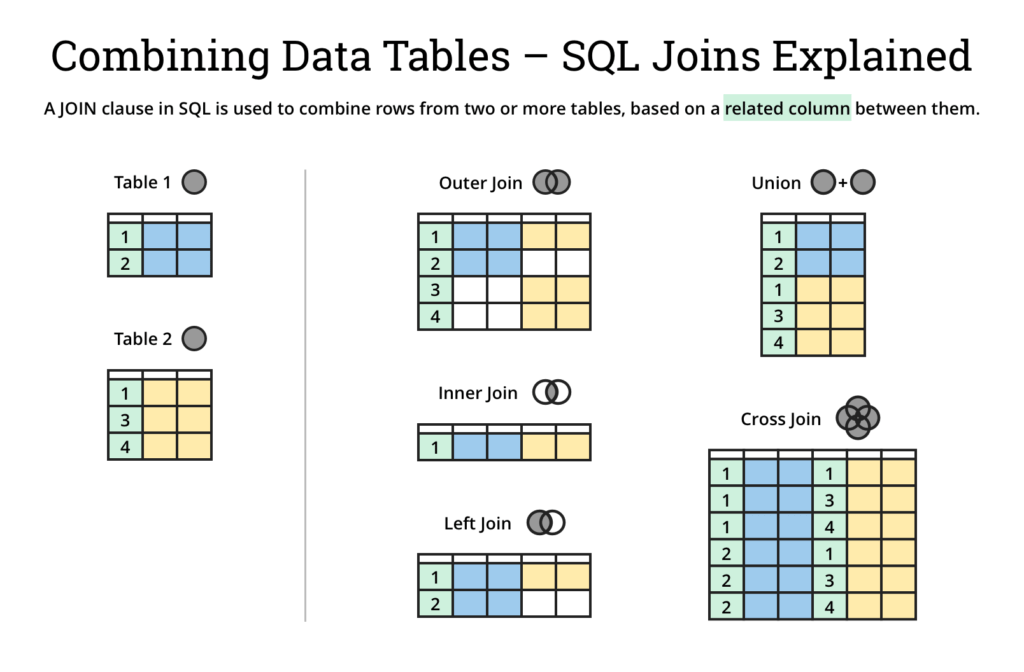

In [23]:
pd.read_sql("SELECT * from users as a left join users as b on a. `Episode Date` = b. `Reported Date` LIMIT 5", con = conn)



,index,_id,Assigned_ID,Outbreak Associated,Age Group,Neighbourhood Name,FSA,Source of Infection,Classification,Episode Date,Reported Date,Client Gender,Outcome,Currently Hospitalized,Currently in ICU,Currently Intubated,Ever Hospitalized,Ever in ICU,Ever Intubated,index,_id,Assigned_ID,Outbreak Associated,Age Group,Neighbourhood Name,FSA,Source of Infection,Classification,Episode Date,Reported Date,Client Gender,Outcome,Currently Hospitalized,Currently in ICU,Currently Intubated,Ever Hospitalized,Ever in ICU,Ever Intubated
0,0,174440,1,Sporadic,50 to 59 Years,Willowdale East,M2N,Travel,CONFIRMED,2020-01-22,2020-01-23,FEMALE,RESOLVED,No,No,No,No,No,No,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
1,1,174441,2,Sporadic,50 to 59 Years,Willowdale East,M2N,Travel,CONFIRMED,2020-01-21,2020-01-23,MALE,RESOLVED,No,No,No,Yes,No,No,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
2,2,174442,3,Sporadic,20 to 29 Years,Parkwoods-Donalda,M3A,Travel,CONFIRMED,2020-02-05,2020-02-21,FEMALE,RESOLVED,No,No,No,No,No,No,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
3,3,174443,4,Sporadic,60 to 69 Years,Church-Yonge Corridor,M4W,Travel,CONFIRMED,2020-02-16,2020-02-25,FEMALE,RESOLVED,No,No,No,No,No,No,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
4,4,174444,5,Sporadic,60 to 69 Years,Church-Yonge Corridor,M4W,Travel,CONFIRMED,2020-02-20,2020-02-26,MALE,RESOLVED,No,No,No,No,No,No,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None


#Practice Problem - Employees Earning More Than Their Managers

The Employee table holds all employees including their managers. Every employee has an Id, and there is also a column for the manager Id.



```
+----+-------+--------+-----------+
| Id | Name  | Salary | ManagerId |
+----+-------+--------+-----------+
| 1  | Joe   | 70000  | 3         |
| 2  | Henry | 80000  | 4         |
| 3  | Sam   | 60000  | NULL      |
| 4  | Max   | 90000  | NULL      |
+----+-------+--------+-----------+
```

Given the Employee table, write a SQL query that finds out employees who earn more than their managers. For the above table, Joe is the only employee who earns more than his manager.



```
+----------+
| Employee |
+----------+
| Joe      |
+----------+
```



In [ ]:
df = pd.DataFrame(([[1, 'Joe', 70000, 3], [2, 'Henry', 80000, 4], [3, 'Sam', 60000, 'NULL'], [4,'Max',90000,'NULL']]),
                   columns=['Id', 'Name', 'Salary', 'ManagerId'])
df.head()